# Visualizing data

Import the necessary library

In [1]:
import pandas as pd 
# Pandas is a powerful library for data manipulation and analysis (reading, writing, cleaning, preprocessing, data analysis (grouping, merging, and reshaping data))
import numpy as np
# NumPy is a fundamental package for scientific computing in Python. NumPy is often used for numerical computations and data analysis)
import matplotlib.pyplot as plt
# Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python.
import seaborn as sb
# Seaborn is a statistical data visualization library based on Matplotlib. It simplifies the creation of complex visualizations (heatmaps, violin plots, pair plots)

Reading our CSV file 

In [2]:
df = pd.read_csv('flow.csv')
df.head()

/tmp/ipykernel_209026/3613370282.py:1: DtypeWarning: Columns (3,5,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow.csv')


,Timestamp,Datapath_id,Ip_src,Mac_src,Ip_dst,Mac_dst,Arp,Arp_code,Ip_protocole,Port_src,...,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Hard_timeout,Idle_timeout,Attack,Attack_type
0,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
1,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
2,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
3,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
4,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN


In [3]:
df.shape

(1864563, 44)

In [4]:
df.columns

Index(['Timestamp', 'Datapath_id', 'Ip_src', 'Mac_src', 'Ip_dst', 'Mac_dst',
       'Arp', 'Arp_code', 'Ip_protocole', 'Port_src', 'Port_dst', 'Icmp',
       'Icmp_code', 'Icmp_type', 'Tcp', 'Tcp_flags', 'NS', 'WCR', 'ECE', 'URG',
       'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'SSL', 'SSH', 'Ftp', 'Udp',
       'Dns', 'Dhcp', 'Flow_duration', 'Flow_dur_nsec', 'Packet_count',
       'Pkt_per_sec', 'Pkt_per_nsec', 'Bytes', 'Bytes_per_sec',
       'Bytes_per_nsec', 'Hard_timeout', 'Idle_timeout', 'Attack',
       'Attack_type'],
      dtype='object')

Drop unnecessary columns.

For now we do not need Attack type, we will use it in the classification part.

In [5]:
df = df.drop(columns=['Timestamp', 'Datapath_id', 'Ip_src', 'Ip_dst', 'Mac_src', 'Mac_dst',
                        'Ip_protocole', 'Port_src','Tcp_flags','NS','WCR','ECE','URG','SSL','SSH','Flow_dur_nsec','Pkt_per_nsec','Bytes_per_nsec', 'Hard_timeout', 'Idle_timeout','Attack_type'])
df

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Ftp,Udp,Dns,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec,Attack
0,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0,0,0.000000,0,0.000000,0
1,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,10,0,0.000000,0,0.000000,0
2,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,20,0,0.000000,0,0.000000,0
3,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,30,0,0.000000,0,0.000000,0
4,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,40,0,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864558,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,74,8,0.108108,3436,46.432432,1
1864559,0,NaN,60460.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,74,7,0.094595,1922,25.972973,1
1864560,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,74,2,0.027027,444,6.000000,1
1864561,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,74,1,0.013514,1351,18.256757,1


# Missing value analysis

The number of null values for each column.

In [6]:
number_null_value=df.isnull().sum()
number_null_value

Arp                    0
Arp_code         1852689
Port_dst          338242
Icmp               11874
Icmp_code        1538195
Icmp_type        1538195
Tcp                11874
ACK               649666
PSH               649666
RST               649666
SYN               649666
FIN               649666
Http               11874
Ftp                11874
Udp                11874
Dns                11874
Dhcp               11874
Flow_duration          0
Packet_count           0
Pkt_per_sec            0
Bytes                  0
Bytes_per_sec          0
Attack                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864563 entries, 0 to 1864562
Data columns (total 23 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Arp            int64  
 1   Arp_code       float64
 2   Port_dst       float64
 3   Icmp           float64
 4   Icmp_code      float64
 5   Icmp_type      float64
 6   Tcp            float64
 7   ACK            float64
 8   PSH            float64
 9   RST            float64
 10  SYN            float64
 11  FIN            float64
 12  Http           float64
 13  Ftp            float64
 14  Udp            float64
 15  Dns            float64
 16  Dhcp           float64
 17  Flow_duration  int64  
 18  Packet_count   int64  
 19  Pkt_per_sec    float64
 20  Bytes          int64  
 21  Bytes_per_sec  float64
 22  Attack         int64  
dtypes: float64(18), int64(5)
memory usage: 327.2 MB


Arp_code, Icmp_code, Icmp_type were replaced with -1 instead of 0 because for each one 0 is a reserved flag.

In [8]:
df[['Arp_code','Icmp_code','Icmp_type']] = df[['Arp_code','Icmp_code','Icmp_type']].fillna(-1).copy()
df[['Arp','Port_dst','Icmp','Tcp', 'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'Ftp', 'Udp', 'Dns', 'Dhcp']] = df[['Arp','Port_dst','Icmp','Tcp', 'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'Ftp', 'Udp', 'Dns', 'Dhcp']].fillna(0).copy()

# Correlation Analysis

<Axes: >

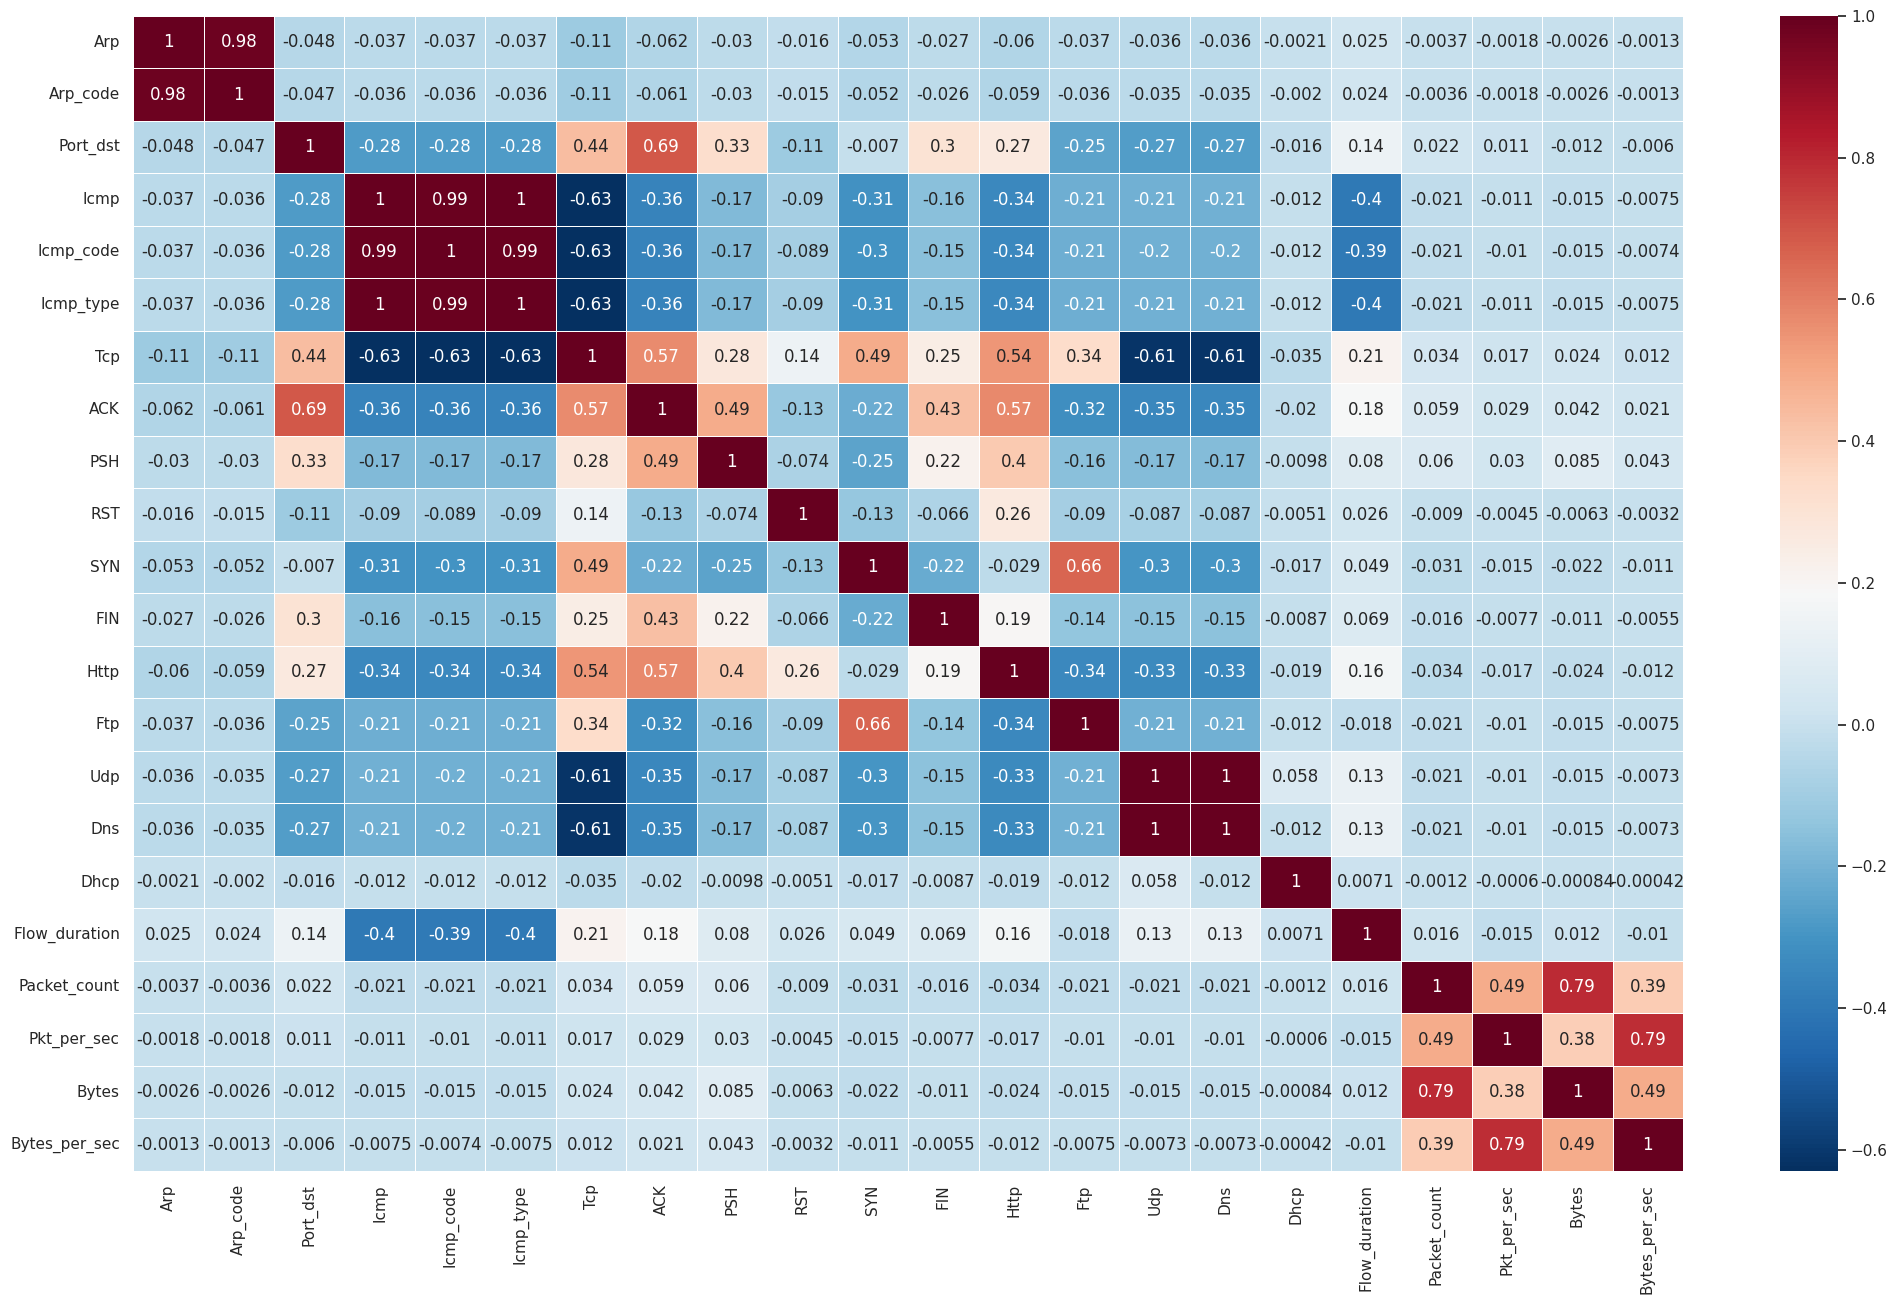

In [9]:
matrix_corr_pearson = df.drop(columns=['Attack'], axis=1).corr(method='pearson')
sb.set(rc={'figure.figsize':(25,15)})
sb.heatmap(matrix_corr_pearson,
            xticklabels=matrix_corr_pearson.columns,
            yticklabels=matrix_corr_pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

We notice a high correlation between Arp and Arp_code; Icmp, Icmp_code and Icmp_type and lastly between Udp and Dns. So we dropped the following:

In [10]:
columnsdrop=['Dns','Icmp','Icmp_code','Arp']
df=df.drop(columns=columnsdrop,axis=1)
df

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec,Attack
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.000000,0,0.000000,0
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10,0,0.000000,0,0.000000,0
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20,0,0.000000,0,0.000000,0
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30,0,0.000000,0,0.000000,0
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40,0,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864558,-1.0,60444.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,8,0.108108,3436,46.432432,1
1864559,-1.0,60460.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,7,0.094595,1922,25.972973,1
1864560,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,2,0.027027,444,6.000000,1
1864561,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,74,1,0.013514,1351,18.256757,1


# Feature Engineering

In [11]:
df.shape

(1864563, 19)

In [12]:
df.columns

Index(['Arp_code', 'Port_dst', 'Icmp_type', 'Tcp', 'ACK', 'PSH', 'RST', 'SYN',
       'FIN', 'Http', 'Ftp', 'Udp', 'Dhcp', 'Flow_duration', 'Packet_count',
       'Pkt_per_sec', 'Bytes', 'Bytes_per_sec', 'Attack'],
      dtype='object')

In [13]:
df.dtypes

Arp_code         float64
Port_dst         float64
Icmp_type        float64
Tcp              float64
ACK              float64
PSH              float64
RST              float64
SYN              float64
FIN              float64
Http             float64
Ftp              float64
Udp              float64
Dhcp             float64
Flow_duration      int64
Packet_count       int64
Pkt_per_sec      float64
Bytes              int64
Bytes_per_sec    float64
Attack             int64
dtype: object

In [14]:
print(len(df['Attack'].unique()))

2


We plot our attack data distribution.

---- Attack ----
[0 1]
Number of attacks: 2


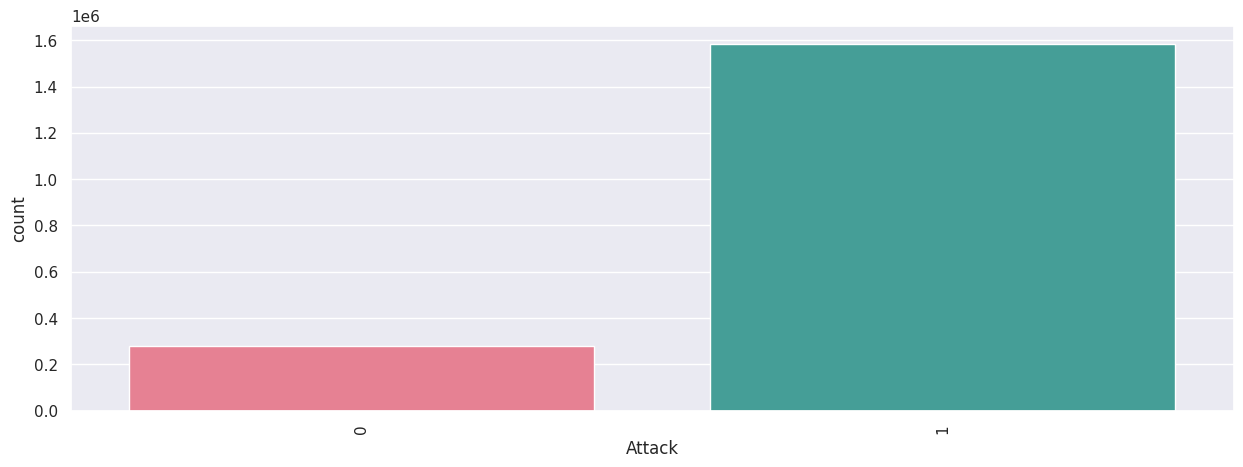

In [15]:
#check unique value for each column Attack
print('---- Attack ----')
print(df['Attack'].unique())
print('Number of attacks:', len(df['Attack'].unique()))
colors = sb.color_palette("husl", len(df['Attack'].unique()))
sb.set(rc={'figure.figsize':(15,5)})
#Plot Bar chart to understand Attack types
p=sb.countplot(x='Attack', hue='Attack', data=df, palette=colors, legend=False)
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [16]:
df.groupby('Attack').size()

Attack
0     280272
1    1584291
dtype: int64

Count the percentage of each class (Attack or Not attack)

Class=0, n=280272 (15.032%)
Class=1, n=1584291 (84.968%)


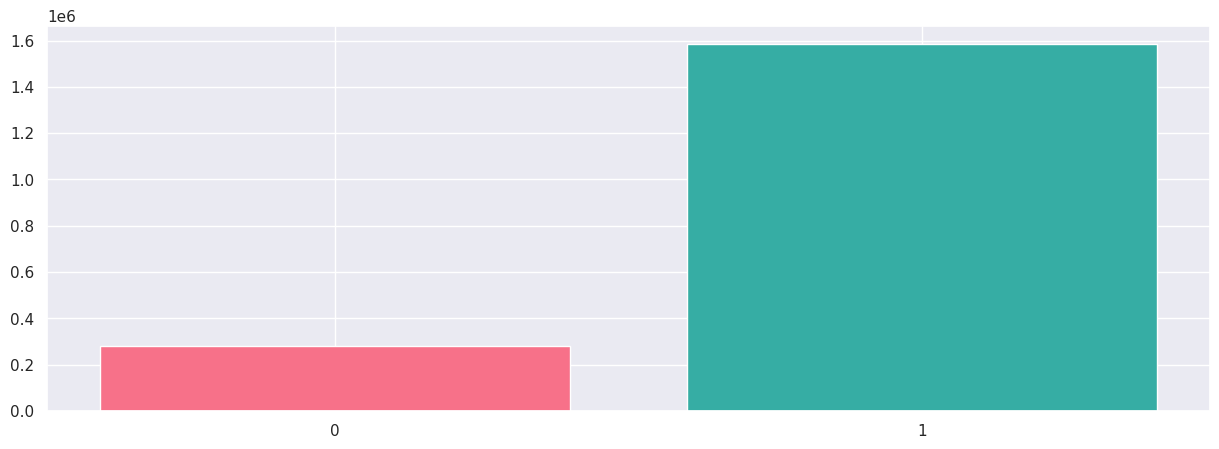

In [17]:
from collections import Counter
data = df.values
X, y = data[:, :-1], data[:, -1]
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
colors = sb.color_palette("husl", len(df['Attack'].unique()))
plt.bar(counter.keys(), counter.values(), color=colors)
plt.xticks([0, 1])
plt.show()

# Dataset Separation


Putting all attack data in df_attack

In [18]:
df_attack = df[df['Attack']==1]
df_attack=df_attack.reset_index(drop=True)
df_attack

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec,Attack
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3,0,0.000000,0,0.000000,1
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13,0,0.000000,0,0.000000,1
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23,0,0.000000,0,0.000000,1
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,33,0,0.000000,0,0.000000,1
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,43,0,0.000000,0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584286,-1.0,60444.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,8,0.108108,3436,46.432432,1
1584287,-1.0,60460.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,7,0.094595,1922,25.972973,1
1584288,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,2,0.027027,444,6.000000,1
1584289,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,74,1,0.013514,1351,18.256757,1


In [19]:
df_attack = df_attack.drop('Attack', axis=1)
df_attack

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3,0,0.000000,0,0.000000
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13,0,0.000000,0,0.000000
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23,0,0.000000,0,0.000000
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,33,0,0.000000,0,0.000000
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,43,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584286,-1.0,60444.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,8,0.108108,3436,46.432432
1584287,-1.0,60460.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,7,0.094595,1922,25.972973
1584288,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,2,0.027027,444,6.000000
1584289,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,74,1,0.013514,1351,18.256757


We do the same thing for normal traffic

In [20]:
df= df[df['Attack']==0]
df=df.reset_index(drop=True)
df

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec,Attack
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.000000,0,0.000000e+00,0
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10,0,0.000000,0,0.000000e+00,0
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20,0,0.000000,0,0.000000e+00,0
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30,0,0.000000,0,0.000000e+00,0
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40,0,0.000000,0,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280267,-1.0,5005.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,4020,77.307692,6083384,1.169882e+05,0
280268,-1.0,5005.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,147079,2828.442308,6685020814,1.285581e+08,0
280269,-1.0,34228.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,110957,2133.788462,7323330,1.408333e+05,0
280270,-1.0,5005.0,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50,0,0.000000,0,0.000000e+00,0


In [21]:
df=df.drop('Attack', axis=1)
df

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.000000,0,0.000000e+00
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10,0,0.000000,0,0.000000e+00
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20,0,0.000000,0,0.000000e+00
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30,0,0.000000,0,0.000000e+00
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40,0,0.000000,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280267,-1.0,5005.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,4020,77.307692,6083384,1.169882e+05
280268,-1.0,5005.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,147079,2828.442308,6685020814,1.285581e+08
280269,-1.0,34228.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,110957,2133.788462,7323330,1.408333e+05
280270,-1.0,5005.0,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50,0,0.000000,0,0.000000e+00


# Train, validation and test dataset

Divide our data into : 60% training, 20% validation and 20% tests

In [22]:
X_train, X_valid, X_test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/manel/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [23]:
X_attack = df_attack

In [24]:
X_train.describe()

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec
count,168163.000000,168163.000000,168163.000000,168163.000000,168163.000000,168163.000000,168163.0,168163.000000,168163.000000,168163.000000,168163.000000,168163.000000,168163.000000,168163.000000,168163.000000,168163.000000,1.681630e+05,1.681630e+05
mean,-0.892241,39358.414104,-0.939594,0.941563,0.805724,0.144901,0.0,0.270458,0.268692,0.087076,0.053192,0.004276,0.004276,29.780766,1270.925822,94.285616,3.114389e+07,2.250847e+06
std,0.524063,18591.708845,0.701260,0.234569,0.395643,0.352002,0.0,0.444198,0.443281,0.281948,0.224418,0.065248,0.065248,17.503692,10494.708411,1570.759170,3.729803e+08,5.355164e+07
min,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,-1.000000,35897.500000,-1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,-1.000000,44101.000000,-1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,-1.000000,52562.000000,-1.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
max,2.000000,60986.000000,8.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,116.000000,285588.000000,117012.000000,1.309046e+10,5.205008e+09


We notice from the describe function that the port distination odly distributed.

In [25]:
df['Port_dst'].value_counts()

Port_dst
0.0        15022
80.0       12274
5005.0     10608
21.0        7468
68.0         607
           ...  
53001.0       18
57383.0       18
48370.0       18
43062.0       18
60064.0       18
Name: count, Length: 2498, dtype: int64

We use CountFrequencyEndocer to replace the values with their frequency apparition

In [26]:
from feature_engine.encoding import CountFrequencyEncoder
X_train['Port_dst'] = X_train['Port_dst'].astype('object')
X_valid['Port_dst'] = X_valid['Port_dst'].astype('object')
X_test['Port_dst'] = X_test['Port_dst'].astype('object')
count_enc = CountFrequencyEncoder(encoding_method="frequency", variables=['Port_dst'])
count_enc.fit(X_train)
X = count_enc.transform(df)
X_train = count_enc.transform(X_train)
X_valid = count_enc.transform(X_valid)
X_test = count_enc.transform(X_test)
print(X_train['Port_dst'].describe())

count    168163.000000
mean          0.007356
std           0.016136
min           0.000030
25%           0.000339
50%           0.000511
75%           0.000714
max           0.054162
Name: Port_dst, dtype: float64


We observe the same problem for Packet_count, Pkt_per_sec, Bytes and Bytes_per_sec. But in this case we use StandardScaler

## Standardization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num=['Packet_count','Pkt_per_sec','Bytes', 'Bytes_per_sec']
scaler.fit(X_train[num])
X_train[num] = scaler.transform(X_train[num])
X_valid[num] = scaler.transform(X_valid[num])
X_attack[num] = scaler.transform(X_attack[num])
X[num] = scaler.transform(X[num])
X_test[num] = scaler.transform(X_test[num])

# Autoencoder

Creation of the model.

In [28]:
import tensorflow as tf

# Define the encoder
encoder_input = tf.keras.layers.Input((df.shape[1],))
encoder = tf.keras.layers.Dense(20, activation = 'sigmoid')(encoder_input)
encoder = tf.keras.layers.Dense(10, activation = 'tanh')(encoder)

# Define the decoder
decoder = tf.keras.layers.Dense(20, activation='sigmoid')(encoder)
decoder = tf.keras.layers.Dense(15, activation='tanh')(decoder) 
decoder = tf.keras.layers.Dense(10, activation='relu')(decoder) 
decoder = tf.keras.layers.Dense((df.shape[1]), activation='relu')(decoder) 

# Create the autoencoder model
autoencoder = tf.keras.Model(inputs =encoder_input, outputs = decoder)
# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['Accuracy'])

# Print the model summary
autoencoder.summary()

2024-04-14 22:28:05.760615: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-14 22:28:05.769580: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-14 22:28:05.814502: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-14 22:28:06.889321: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-14 22:28:08.928593: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-14 22:28:08.929037: W tensorflow/co

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 18)             │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,483 (5.79 KB)

 Trainable params: 1,483 (5.79 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the model fit autoencoder
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=3000, validation_data=(X_valid, X_valid))

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Accuracy: 5.1555e-04 - loss: 66.7654 - val_Accuracy: 0.0000e+00 - val_loss: 66.5417
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.0024 - loss: 66.6980 - val_Accuracy: 0.0355 - val_loss: 66.5191
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.0345 - loss: 66.7262 - val_Accuracy: 0.0355 - val_loss: 66.5098
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.0347 - loss: 66.7397 - val_Accuracy: 0.0355 - val_loss: 66.5087
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.0343 - loss: 66.7682 - val_Accuracy: 0.0355 - val_loss: 66.5063
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.0335 - loss: 67.0476 - val_Accuracy: 0.0355 - val_loss: 66.5019
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.0338 - loss: 66.9287 - val_Accuracy: 0.0355 - val_loss: 66.4954
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.0352 - loss: 66.7593 - v

Plot the history.

In [30]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('MSE')
  ax1.grid(True)

  ax2.plot(history.history['Accuracy'], label='accuracy')
  ax2.plot(history.history['val_Accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

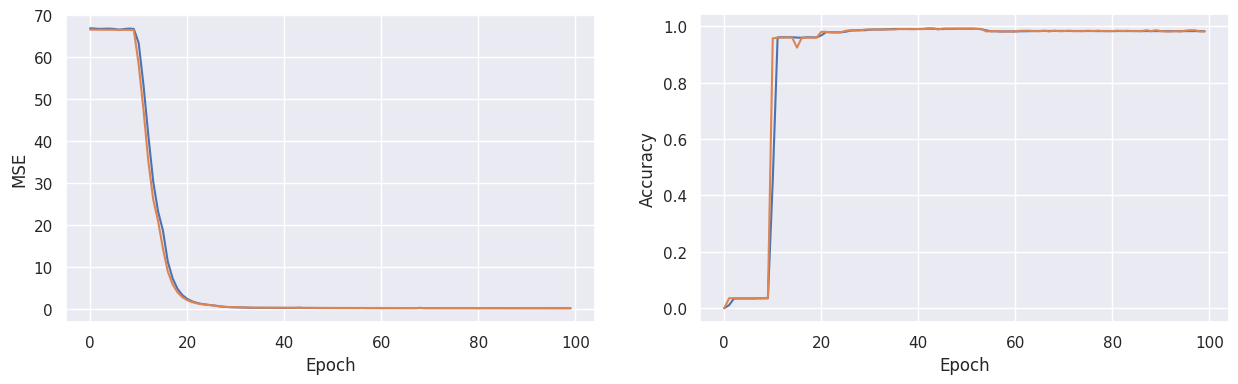

In [31]:
plot_history(history)

Evaluete the model with the test set.

In [32]:
# Evaluate the model on the test set
mse = autoencoder.evaluate(X_test, X_test)
print("Mean Squared Error on Test Set:", mse)

1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - Accuracy: 0.9815 - loss: 0.2670
Mean Squared Error on Test Set: [0.2794576585292816, 0.9812327027320862]


We now use the test set to  calculate our threshold.

In [33]:
prediction = autoencoder.predict(X_test)
prediction_loss = tf.keras.losses.mae(prediction, X_test)
loss_threshold = np.percentile(prediction_loss, 98)
print(f'The prediction threshold for outliers is {loss_threshold: .2f}')

1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step
The prediction threshold for outliers is  0.38


In [34]:
# Make predictions
predictions = autoencoder.predict(X_attack)

# Calculate prediction loss (MAE)
prediction_loss = np.mean(np.abs(predictions - X_attack), axis=1)

# Classify samples
is_outlier = prediction_loss < loss_threshold
ffalse = is_outlier.value_counts()[False]

49510/49510 ━━━━━━━━━━━━━━━━━━━━ 31s 629us/step


In [35]:
ffalse

1584035

The total number of attacks is 1584291 and we got 1584035. The precision is of 99,98%.